# Python Crush Course for Astronomy
This couse is part of the python training series hosted by National Astronomy Observatory, the full courses are [here](https://hebl.china-vo.org/course/PIA2020/).
## Data
In this section we will download the data from [LAMOST data release 5 version 3](http://dr5.lamost.org/v3/spectrum/fits/), and perform preliminary data conditioning befor we dive deep into the analysis.

In [2]:
import os
import urllib
import csv
from concurrent.futures import ThreadPoolExecutor, wait, ALL_COMPLETED
from astropy.io import fits
import matplotlib.pyplot as plt
import itertools
import pandas as pd

# Download data

In [3]:
def download(url,to_dir,filename):
    fdir = to_dir + filename.split('/')[-1]
    print('start downloading %s' %url)
    urllib.request.urlretrieve(url, filename=fdir)
    print('finish downloading %s' %url)

In [34]:
path = os.path.join(os.getcwd(),'') # get the current working directory
# download_list = 'star.csv'
# download_list = 'galaxy.csv'
download_list = 'qso.csv'
# to_dir = './LAMOST_spectra/star/'
# to_dir = './LAMOST_spectra/galaxy/'
# to_dir = '/Users/qyq/Development/Python天文培训/qso/'
to_dir = path + 'qso/'
url_reader = itertools.islice(csv.DictReader(open(download_list),delimiter='|'),2000)
filenames = [row['obsfits_file'].split('/')[-1] for row in url_reader]
print(filenames)

['spec-57755-HD093318N282204M02_sp02-017.fits.gz', 'spec-57755-HD093318N282204M02_sp02-030.fits.gz', 'spec-57755-HD093318N282204M02_sp02-050.fits.gz', 'spec-57755-HD093318N282204M02_sp02-079.fits.gz', 'spec-57755-HD093318N282204M02_sp02-128.fits.gz', 'spec-57755-HD093318N282204M02_sp02-198.fits.gz', 'spec-57755-HD093318N282204M02_sp02-224.fits.gz', 'spec-57755-HD093318N282204M02_sp02-232.fits.gz', 'spec-57755-HD093318N282204M02_sp02-239.fits.gz', 'spec-57755-HD093318N282204M02_sp12-043.fits.gz', 'spec-57755-HD093318N282204M02_sp12-049.fits.gz', 'spec-57755-HD093318N282204M02_sp12-073.fits.gz', 'spec-57755-HD093318N282204M02_sp12-107.fits.gz', 'spec-57755-HD093318N282204M02_sp12-148.fits.gz', 'spec-57755-HD093318N282204M02_sp16-221.fits.gz', 'spec-57755-HD093318N282204M02_sp01-025.fits.gz', 'spec-57755-HD093318N282204M02_sp01-067.fits.gz', 'spec-57755-HD093318N282204M02_sp16-086.fits.gz', 'spec-57755-HD093318N282204M02_sp16-151.fits.gz', 'spec-57755-HD093318N282204M02_sp13-016.fits.gz',

In [4]:
print(f"Size of filenames is {len(filenames)}")

Size of filenames is 2000


In [5]:
filenames[0].split('/')[-1]

'spec-57755-GAC085S03M1_sp03-181.fits.gz'

In [6]:
filenames[0]

'spec-57755-GAC085S03M1_sp03-181.fits.gz'

In [7]:
url_reader = itertools.islice(csv.DictReader(open(download_list),delimiter='|'),2000)
urls = ['http://dr5.lamost.org/v3/spectrum/fits/'+ row['catalogue_obsid'] for row in url_reader]
print(urls)

['http://dr5.lamost.org/v3/spectrum/fits/505303181', 'http://dr5.lamost.org/v3/spectrum/fits/505402107', 'http://dr5.lamost.org/v3/spectrum/fits/505402169', 'http://dr5.lamost.org/v3/spectrum/fits/505402181', 'http://dr5.lamost.org/v3/spectrum/fits/505402215', 'http://dr5.lamost.org/v3/spectrum/fits/505412053', 'http://dr5.lamost.org/v3/spectrum/fits/505412099', 'http://dr5.lamost.org/v3/spectrum/fits/505412115', 'http://dr5.lamost.org/v3/spectrum/fits/505412143', 'http://dr5.lamost.org/v3/spectrum/fits/505412158', 'http://dr5.lamost.org/v3/spectrum/fits/505412195', 'http://dr5.lamost.org/v3/spectrum/fits/505412247', 'http://dr5.lamost.org/v3/spectrum/fits/505401041', 'http://dr5.lamost.org/v3/spectrum/fits/505401029', 'http://dr5.lamost.org/v3/spectrum/fits/505401066', 'http://dr5.lamost.org/v3/spectrum/fits/505413018', 'http://dr5.lamost.org/v3/spectrum/fits/505413035', 'http://dr5.lamost.org/v3/spectrum/fits/505413073', 'http://dr5.lamost.org/v3/spectrum/fits/505413177', 'http://dr5

In [8]:
print(f"Size of urls is {len(urls)}")

Size of urls is 2000


In [9]:
for (url,filename) in zip(urls,filenames):
    download(url,to_dir,filename)

start downloading http://dr5.lamost.org/v3/spectrum/fits/505303181
finish downloading http://dr5.lamost.org/v3/spectrum/fits/505303181
start downloading http://dr5.lamost.org/v3/spectrum/fits/505402107
finish downloading http://dr5.lamost.org/v3/spectrum/fits/505402107
start downloading http://dr5.lamost.org/v3/spectrum/fits/505402169
finish downloading http://dr5.lamost.org/v3/spectrum/fits/505402169
start downloading http://dr5.lamost.org/v3/spectrum/fits/505402181
finish downloading http://dr5.lamost.org/v3/spectrum/fits/505402181
start downloading http://dr5.lamost.org/v3/spectrum/fits/505402215
finish downloading http://dr5.lamost.org/v3/spectrum/fits/505402215
start downloading http://dr5.lamost.org/v3/spectrum/fits/505412053
finish downloading http://dr5.lamost.org/v3/spectrum/fits/505412053
start downloading http://dr5.lamost.org/v3/spectrum/fits/505412099
finish downloading http://dr5.lamost.org/v3/spectrum/fits/505412099
start downloading http://dr5.lamost.org/v3/spectrum/fit

# Data preparation

In [35]:
# datadir='./LAMOST_spectra/star'
datadir=path + 'qso/'
# datadir = path + 'galaxy/'
# datadir='./LAMOST_spectra/galaxy'
filenames = os.listdir(datadir)
filepaths = [os.path.join(datadir, filename) for filename in filenames if 'fits'in filename]
wavelength_list =[]
flux_list=[]
for file in filepaths[:2000]:
    hdulist = fits.open(file)
    flux = hdulist[0].data[0]
    flux_list.append(flux)
    wavelength = hdulist[0].data[2]
    wavelength_list.append(wavelength)

In [36]:
hdulist[0].data[0]

array([ 2.654203 , 11.7086115, 11.042432 , ...,  6.4082747,  4.427196 ,
        0.7963028], dtype=float32)

In [7]:
len(hdulist[0].data[2])

3909

In [9]:
wavelength_list

[array([3699.9863, 3700.8384, 3701.6907, ..., 9094.945 , 9097.04  ,
        9099.135 ], dtype=float32),
 array([3699.9863, 3700.8384, 3701.6907, ..., 9094.945 , 9097.04  ,
        9099.135 ], dtype=float32),
 array([3699.9863, 3700.8384, 3701.6907, ..., 9094.945 , 9097.04  ,
        9099.135 ], dtype=float32),
 array([3699.9863, 3700.8384, 3701.6907, ..., 9094.945 , 9097.04  ,
        9099.135 ], dtype=float32),
 array([3699.9863, 3700.8384, 3701.6907, ..., 9094.945 , 9097.04  ,
        9099.135 ], dtype=float32),
 array([3699.9863, 3700.8384, 3701.6907, ..., 9094.945 , 9097.04  ,
        9099.135 ], dtype=float32),
 array([3699.9863, 3700.8384, 3701.6907, ..., 9088.665 , 9090.759 ,
        9092.852 ], dtype=float32),
 array([3699.9863, 3700.8384, 3701.6907, ..., 9094.945 , 9097.04  ,
        9099.135 ], dtype=float32),
 array([3699.9863, 3700.8384, 3701.6907, ..., 9094.945 , 9097.04  ,
        9099.135 ], dtype=float32),
 array([3699.9863, 3700.8384, 3701.6907, ..., 9094.945 , 9097.04

In [10]:
print(f"Size of wavelenth_list is ({len(wavelength_list)},{len(wavelength_list[0])})")

Size of wavelenth_list is (2000,3909)


In [11]:
flux_list

[array([ -0.3879027, -28.010593 , -14.318405 , ...,  22.352816 ,
         19.018473 ,   7.1144233], dtype=float32),
 array([19.723276, 23.482525,  9.913243, ..., 30.28409 , 33.112316,
        33.46031 ], dtype=float32),
 array([53.876324 , -1.4385581, -5.0120497, ..., 28.628046 , 28.88233  ,
        33.7867   ], dtype=float32),
 array([-8.102587 ,  3.9177907,  7.694216 , ...,  0.       ,  0.       ,
         0.       ], dtype=float32),
 array([-2.6961858 , -2.4214396 ,  0.89376396, ...,  0.        ,
         0.        ,  0.        ], dtype=float32),
 array([-50.083107,  61.842335,  60.213486, ...,   0.      ,   0.      ,
          0.      ], dtype=float32),
 array([36.120964,  9.800772, 17.182648, ...,  0.      ,  0.      ,
         0.      ], dtype=float32),
 array([26.810038,  5.107823, 45.025707, ..., 86.16142 , 85.56059 ,
        92.82862 ], dtype=float32),
 array([-57.522846, -17.052505,  23.10067 , ...,   0.      ,   0.      ,
          0.      ], dtype=float32),
 array([14.77423

每条光谱的波长值不完全一致，插值取共同值

In [37]:
WAVE_LENGTH_BEGIN = 3800
WAVE_LENGTH_END = 8900
WAVE_LENGTH_INTERVAL = 2
def calculate_interpolation(left, right, pos):
        ratio = (pos-left[0])/(right[0]-left[0])
        new_flux = (right[1]-left[1])*ratio + left[1]
        return pos, new_flux
    
def interpolation(wavelength,flux):
    pos_list = []
    target_list = []
    for pos in range(WAVE_LENGTH_BEGIN, WAVE_LENGTH_END, WAVE_LENGTH_INTERVAL):
        pos_list.append(pos)
    source = [(wavelength[i], flux[i]) for i in range(len(flux))]
    wave_index = 0
    right_wave_length = source[wave_index+1][0]
    
    for pos in pos_list:
        while pos > right_wave_length:
            wave_index += 1
            try:
                right_wave_length = source[wave_index+1][0]
            except Exception:
                raise 
        if pos == right_wave_length:
            target_list.append((source[wave_index + 1][1]))
        else:
            new_point = calculate_interpolation(source[wave_index],source[wave_index + 1],
                                                                             pos)
            target_list.append(new_point[1])
    return target_list

In [38]:
interpolated_qso =[]

In [39]:
for wavelength,flux in zip(wavelength_list, flux_list):
    try:
        interpolated_qso.append(interpolation(wavelength,flux))
    except Exception:
        print(wavelength,len(flux))

In [40]:
interpolated_qso = pd.DataFrame(interpolated_qso)

In [41]:
interpolated_qso

,0,1,2,3,4,5,6,7,8,9,...,2540,2541,2542,2543,2544,2545,2546,2547,2548,2549
0,11.073306,14.530291,4.572404,17.701024,11.079697,21.813340,-1.395908,6.550402,20.977322,20.151418,...,7.359170,11.162822,16.383590,11.021524,2.068964,-0.422625,7.932014,5.648256,6.247344,6.899583
1,7.372165,-0.802948,-3.698830,3.544825,4.287776,-5.999489,5.291100,9.676865,5.509956,5.667061,...,2.554733,2.743561,10.427747,-4.798907,20.346682,-1.099806,23.016828,2.913539,0.165973,1.348491
2,15.289069,18.296145,20.369446,5.079475,17.961095,5.406054,14.983475,12.297651,20.594225,3.586135,...,1.421013,-1.732061,4.411539,-5.060143,-5.139237,14.938702,8.869812,2.710746,0.738076,-0.287791
3,40.173508,21.023463,18.364365,34.012889,12.768351,48.693675,37.115843,15.116222,70.259977,17.474749,...,19.886703,18.879074,24.604565,21.560650,22.442425,26.947879,24.852048,21.286189,23.145390,17.516248
4,14.231253,26.212193,16.562725,21.540140,21.158048,22.609592,17.625589,22.987685,18.149494,10.686045,...,5.376165,5.353248,11.689788,2.893379,19.029436,1.656610,-4.587875,3.723996,3.893040,3.566247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,17.302119,21.628703,33.291519,18.402085,18.400019,24.388741,21.982444,20.163832,40.735207,36.630014,...,7.001772,11.750889,25.828566,6.449483,0.930714,1.425524,14.132936,8.378369,7.474420,6.368252
1996,39.128982,68.487434,57.771362,63.467337,41.963529,43.992372,55.614265,25.727442,42.302633,56.309283,...,9.144966,9.707208,9.808980,10.130937,7.409823,13.367632,11.659636,11.414686,11.064463,9.576671
1997,24.461392,10.213707,21.285147,21.441783,12.569084,11.081850,12.233896,10.634111,20.152798,21.664315,...,1.081285,1.366786,2.613040,11.705890,14.379531,14.386053,9.715816,1.431729,1.073466,1.418058
1998,3.818947,0.894764,3.449226,6.486790,-5.336456,12.064786,5.244110,-0.668698,-0.644560,3.695722,...,1.975062,4.626224,2.244360,-20.080245,-6.730799,16.614418,-10.260711,-3.998993,-3.394529,-3.786550


In [45]:
interpolated_spectra = interpolated_qso

In [42]:
pos_list = []
for pos in range(WAVE_LENGTH_BEGIN, WAVE_LENGTH_END, WAVE_LENGTH_INTERVAL):
    pos_list.append(pos)

In [43]:
pos_list

[3800,
 3802,
 3804,
 3806,
 3808,
 3810,
 3812,
 3814,
 3816,
 3818,
 3820,
 3822,
 3824,
 3826,
 3828,
 3830,
 3832,
 3834,
 3836,
 3838,
 3840,
 3842,
 3844,
 3846,
 3848,
 3850,
 3852,
 3854,
 3856,
 3858,
 3860,
 3862,
 3864,
 3866,
 3868,
 3870,
 3872,
 3874,
 3876,
 3878,
 3880,
 3882,
 3884,
 3886,
 3888,
 3890,
 3892,
 3894,
 3896,
 3898,
 3900,
 3902,
 3904,
 3906,
 3908,
 3910,
 3912,
 3914,
 3916,
 3918,
 3920,
 3922,
 3924,
 3926,
 3928,
 3930,
 3932,
 3934,
 3936,
 3938,
 3940,
 3942,
 3944,
 3946,
 3948,
 3950,
 3952,
 3954,
 3956,
 3958,
 3960,
 3962,
 3964,
 3966,
 3968,
 3970,
 3972,
 3974,
 3976,
 3978,
 3980,
 3982,
 3984,
 3986,
 3988,
 3990,
 3992,
 3994,
 3996,
 3998,
 4000,
 4002,
 4004,
 4006,
 4008,
 4010,
 4012,
 4014,
 4016,
 4018,
 4020,
 4022,
 4024,
 4026,
 4028,
 4030,
 4032,
 4034,
 4036,
 4038,
 4040,
 4042,
 4044,
 4046,
 4048,
 4050,
 4052,
 4054,
 4056,
 4058,
 4060,
 4062,
 4064,
 4066,
 4068,
 4070,
 4072,
 4074,
 4076,
 4078,
 4080,
 4082,
 4084,

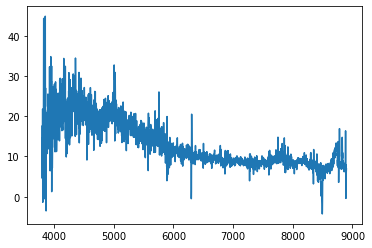

In [46]:
plt.plot(pos_list,interpolated_spectra.iloc[0,:])

In [47]:
spectra_means = interpolated_spectra.mean(1).to_numpy() # calculate mean values over columns
spectra_means

array([13.04358596,  2.32296864,  4.61242463, ...,  4.45607279,
        3.21518373,  5.26302806])

In [48]:
interpolated_spectra.mean?

Signature:
interpolated_spectra.mean(
    axis=None,
    skipna=None,
    level=None,
    numeric_only=None,
    **kwargs,
)
Docstring:
Return the mean of the values over the requested axis.

Parameters
----------
axis : {index (0), columns (1)}
    Axis for the function to be applied on.
skipna : bool, default True
    Exclude NA/null values when computing the result.
level : int or level name, default None
    If the axis is a MultiIndex (hierarchical), count along a
    particular level, collapsing into a Series.
numeric_only : bool, default None
    Include only float, int, boolean columns. If None, will attempt to use
    everything, then use only numeric data. Not implemented for Series.
**kwargs
    Additional keyword arguments to be passed to the function.

Returns
-------
Series or DataFrame (if level specified)
File:      /opt/local/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/generic.py
Type:      method


In [49]:
len(spectra_means)

2000

In [50]:
interpolated_spectra_list = interpolated_spectra.to_numpy()
print(f"Size of interpolated_spectra_list is ({len(interpolated_spectra_list)},{len(interpolated_spectra_list[0])})")

Size of interpolated_spectra_list is (2000,2550)


In [51]:
interpolated_spectra_list

array([[11.07330562, 14.53029067,  4.57240424, ...,  5.6482561 ,
         6.24734393,  6.89958272],
       [ 7.37216513, -0.80294756, -3.69883012, ...,  2.91353922,
         0.16597279,  1.34849075],
       [15.28906884, 18.29614484, 20.36944584, ...,  2.71074614,
         0.73807562, -0.28779114],
       ...,
       [24.46139175, 10.21370708, 21.28514686, ...,  1.43172916,
         1.07346635,  1.41805776],
       [ 3.81894745,  0.89476357,  3.44922618, ..., -3.99899333,
        -3.39452858, -3.78655041],
       [13.09935388, 11.73950344,  9.03971525, ...,  3.45011985,
         2.71358724,  3.59143119]])

In [52]:
standardised_spectra_list=[]
for i,spectra in enumerate(interpolated_spectra_list):
    standardised = spectra/spectra_means[i]
    standardised_spectra_list.append(standardised)

In [53]:
standardised_spectra = pd.DataFrame(standardised_spectra_list)
standardised_spectra

,0,1,2,3,4,5,6,7,8,9,...,2540,2541,2542,2543,2544,2545,2546,2547,2548,2549
0,0.848946,1.113980,0.350548,1.357067,0.849436,1.672342,-0.107019,0.502193,1.608248,1.544929,...,0.564198,0.855809,1.256065,0.844977,0.158619,-0.032401,0.608116,0.433029,0.478959,0.528964
1,3.173596,-0.345656,-1.592286,1.525989,1.845818,-2.582682,2.277732,4.165732,2.371946,2.439577,...,1.099771,1.181058,4.488975,-2.065851,8.758914,-0.473449,9.908368,1.254231,0.071449,0.580503
2,3.314757,3.966709,4.416212,1.101259,3.894068,1.172063,3.248503,2.666201,4.464946,0.777494,...,0.308084,-0.375521,0.956447,-1.097068,-1.114216,3.238796,1.923026,0.587705,0.160019,-0.062395
3,1.592547,0.833406,0.727995,1.348329,0.506159,1.930301,1.471336,0.599233,2.785226,0.692729,...,0.788343,0.748399,0.975367,0.854701,0.889656,1.068260,0.985178,0.843821,0.917523,0.694374
4,1.538336,2.833424,1.790358,2.328395,2.287093,2.443998,1.905249,2.484869,1.961881,1.155115,...,0.581140,0.578663,1.263615,0.312762,2.056999,0.179072,-0.495929,0.402548,0.420821,0.385496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.032787,1.291046,1.987215,1.098445,1.098322,1.455797,1.312162,1.203606,2.431539,2.186495,...,0.417945,0.701426,1.541742,0.384978,0.055556,0.085091,0.843614,0.500116,0.446158,0.380129
1996,1.506929,2.637577,2.224881,2.444244,1.616092,1.694227,2.141807,0.990811,1.629152,2.168574,...,0.352189,0.373842,0.377762,0.390161,0.285366,0.514812,0.449034,0.439600,0.426113,0.368815
1997,5.489451,2.292087,4.776660,4.811812,2.820664,2.486909,2.745443,2.386431,4.522547,4.861751,...,0.242654,0.306724,0.586400,2.626952,3.226951,3.228415,2.180354,0.321298,0.240900,0.318230
1998,1.187785,0.278293,1.072793,2.017549,-1.659767,3.752441,1.631045,-0.207981,-0.200474,1.149459,...,0.614292,1.438868,0.698050,-6.245442,-2.093441,5.167486,-3.191330,-1.243784,-1.055781,-1.177709


In [54]:
standardised_spectra['type']=3 # 2 for galaxy, 3 for qso

In [55]:
# standardised_spectra.to_csv(r'/Users/qyq/Development/Python天文培训/qso_standardised.csv',index=False)
standardised_spectra.to_csv(path+'qso_standardised.csv',index=False)

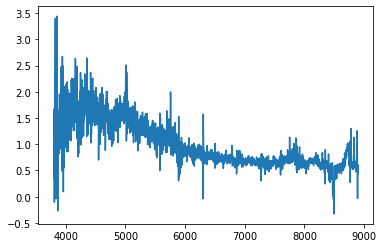

In [56]:
plt.plot(pos_list,standardised_spectra.iloc[0][:2550])

# Check data

In [ ]:
galaxies = pd.read_csv('/Users/qyq/Development/Python天文培训/galaxy_standardised.csv')

In [ ]:
galaxies

In [ ]:
qsos = pd.read_csv('/Users/qyq/Development/Python天文培训/qso_standardised.csv')
qsos